In [1]:
#import required packages
import tweepy
import pandas as pd
import matplotlib.pyplot as plt


# Make the graphs prettier
pd.set_option('display.mpl_style', 'default')

consumerKey = 'mo2l5Rx5lsr4FtDsVCoNzrPSS'
consumerSecret = 'YaxiWDUWyteopJNyqUCpW1XR1k7R87LJihhBgC1OS47UyqqW4E'

#Use tweepy.OAuthHandler to create an authentication using the given key and secret
auth = tweepy.OAuthHandler(consumer_key=consumerKey, consumer_secret=consumerSecret)

#Connect to the Twitter API using the authentication
api = tweepy.API(auth)

#Perform a basic search query where we search for the '#Oscars2015' in the tweets
results = []

for tweet in tweepy.Cursor(api.search, q="google").items(1000):
    results.append(tweet)

print (len(results))


1000


In [2]:
#convert tweets in pandas DataFrame
def toDataFrame(tweets):
    DataSet = pd.DataFrame()
    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['userTimezone'] = [tweet.user.time_zone for tweet in tweets]
    return DataSet


DataSet = toDataFrame(results)
DataSet.head(5)

,tweetID,userTimezone
0,675612875721867265,None
1,675612875105288192,Irkutsk
2,675612875054972928,None
3,675612874882998272,Tokyo
4,675612874182631425,None


In [3]:
#removing invalid timezone record i.e. timezone with none. 

DataSet = DataSet[DataSet.userTimezone.notnull()]
len(DataSet)

534

In [4]:
DataSet.tail(10)

,tweetID,userTimezone
984,675612219305025536,Pacific Time (US & Canada)
986,675612214552748032,Irkutsk
987,675612213923581952,Jakarta
988,675612213705613312,Jakarta
989,675612213227479040,Paris
991,675612211298091008,Madrid
992,675612209825710080,Pacific Time (US & Canada)
993,675612208664027136,Ljubljana
995,675612208378712064,Tokyo
996,675612205279281152,Pacific Time (US & Canada)


In [18]:
#counting numbers of tweets per timezone
tzs = DataSet['userTimezone'].value_counts()
print(tzs)

Pacific Time (US & Canada)        76
Tokyo                             69
Eastern Time (US & Canada)        42
Hawaii                            20
Jakarta                           20
Arizona                           17
Paris                             16
Madrid                            15
Irkutsk                           15
Rome                              13
Central Time (US & Canada)        13
London                            13
Athens                            12
Brasilia                          11
Greenland                         11
Quito                             10
Baghdad                           10
Seoul                              9
New Delhi                          8
Beijing                            7
Kuala Lumpur                       7
Caracas                            6
Jerusalem                          6
Amsterdam                          5
Ljubljana                          5
Bangkok                            5
Moscow                             5
H

In [19]:
#select only top 10 entries 
tzs_top10 = tzs[:10]
print(tzs_top10)

Pacific Time (US & Canada)    76
Tokyo                         69
Eastern Time (US & Canada)    42
Hawaii                        20
Jakarta                       20
Arizona                       17
Paris                         16
Madrid                        15
Irkutsk                       15
Rome                          13
Name: userTimezone, dtype: int64


In [20]:
tzs_last10 = tzs[:-10:-1]
print(tzs_last10)

Monrovia                          1
Indiana (East)                    1
Cairo                             1
St. Petersburg                    1
Lisbon                            1
Mumbai                            1
Tashkent                          1
America/Argentina/Buenos_Aires    1
Kiev                              1
Name: userTimezone, dtype: int64


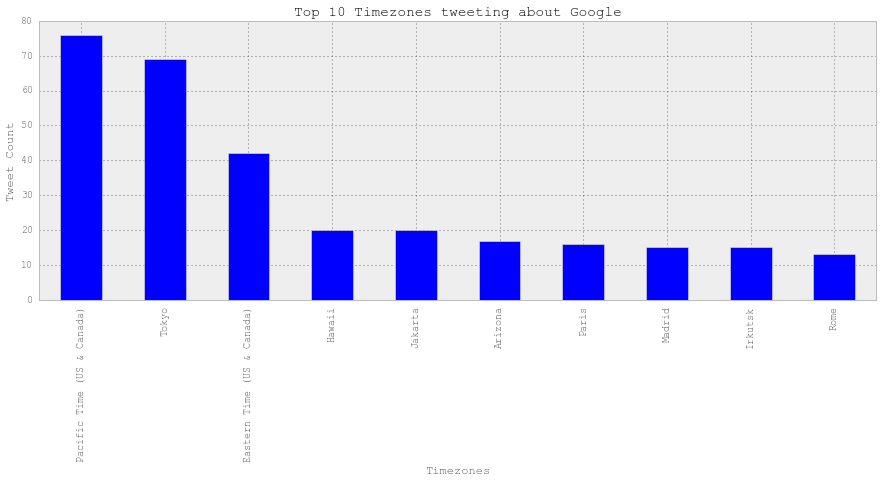

In [30]:
%matplotlib inline

# Create a bar-graph figure of the specified size
plt.rcParams['figure.figsize'] = (15, 5)

# Plot the Time Zone data as a bar-graph
tzs_top10.plot(kind='bar')


# Assign labels and title to the graph to make it more presentable
plt.xlabel('Timezones')
plt.ylabel('Tweet Count')
plt.title('Top 10 Timezones tweeting about Google')
plt.show()

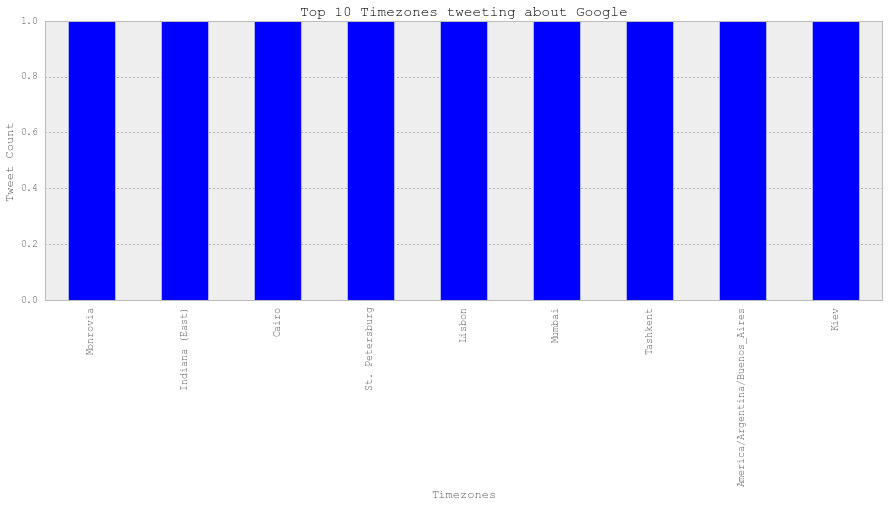

In [31]:
tzs_last10.plot(kind='bar')


# Assign labels and title to the graph to make it more presentable
plt.xlabel('Timezones')
plt.ylabel('Tweet Count')
plt.title('Top 10 Timezones tweeting about Google')
plt.show()